### Logistic Regression with MNIST dataset

In [50]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [51]:
# makes the graphs nicer 
%config InlineBackend.figure_format = 'svg'

In [52]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [53]:
x_train.shape

(60000, 28, 28)

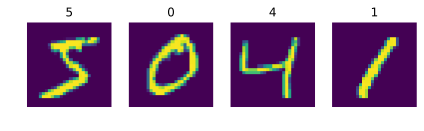

In [54]:
fig,axes = plt.subplots(1,4,figsize=(7,3))
for img,label,ax in zip(x_train[:4],y_train[:4],axes):
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show()    

In [55]:
print(f'train images:{x_train.shape}')
print(f'train labels:{y_train.shape}')
print(f'test images:{x_test.shape}')
print(f'test labels:{x_test.shape}')

train images:(60000, 28, 28)
train labels:(60000,)
test images:(10000, 28, 28)
test labels:(10000, 28, 28)


### Preprocessing

In [56]:
# Flatten all the images
# scale them from 0 to 1 - rightnow its from 0 to 255

In [57]:
# 28 * 28 = 784
x_train = x_train.reshape(60000,(28*28))/255
x_test = x_test.reshape(10000,784)/255

In [58]:
x_test.shape

(10000, 784)

In [59]:
# For the labels(y_train) we need to make them one hot array 
# We are going to use tensorflow session for this one hot conversion
y_train[:4]

array([5, 0, 4, 1], dtype=uint8)

In [60]:
with tf.Session() as sess:
    y_train = sess.run(tf.one_hot(y_train,10))
    y_test = sess.run(tf.one_hot(y_test,10))

In [61]:
y_train[:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Hyperparameters

In [62]:
learning_rate = 0.01
epochs = 20 #or 50 
batch_size = 100
batches = int(x_train.shape[0]/batch_size)

lets see how to determine the shape of W and B

$\mathbf{Y}=\sigma(\mathbf{X}\cdot\mathbf{W} + \mathbf{B})$

$ 
\begin{pmatrix}
    y_1 \\ y_2 \\ \vdots \\ y_{10}
\end{pmatrix}=\sigma\left[
\begin{pmatrix}
    x_1 x_2 \dots  x_{784}
\end{pmatrix}
\begin{pmatrix}
    w_{1, 1} & w_{1, 2}  & \dots  & w_{1, 10} \\
    w_{2, 1} & w_{2, 2}  & \dots  & w_{2, 10} \\
    \vdots &  \vdots & \ddots & \vdots \\
    w_{784, 1} & w_{784, 2}  & \dots  &a w_{784, 10}
\end{pmatrix} +
\begin{pmatrix}
    b_1 \\ b_2 \\ \vdots \\ b_{10}
\end{pmatrix}
\right]
$

Weights shape: 784, 10
Bias shape: 10

In [75]:
# inputs
# X is our "flattened / normalized" images
# Y is our "one hot" labels
X = tf.placeholder('float32', [None, 784])
Y = tf.placeholder('float32', [None, 10])

# weights and bias
# weights convert X to same shape as Y
# bias is the same shape as Y
W = tf.Variable(0.1*np.random.randn(784, 10).astype(np.float32))
B = tf.Variable(0.1*np.random.randn(10).astype(np.float32))

In [76]:
# setup graph, cost, optimizer
pred = tf.nn.softmax(tf.add(tf.matmul(X, W), B))
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(pred), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Lets look at how the cost function works
¶

$
C = \sum -Y\ln(pred)
$

### Example

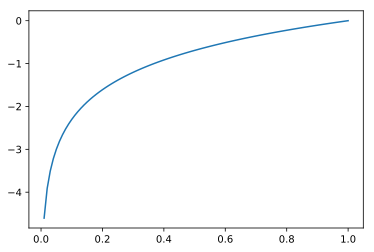

In [77]:
x = np.linspace(1/100,1,100)
plt.plot(x,np.log(x))
plt.show()

when we look at the plot at 0 points goes to negative infinite and at 1 the function equals to 0

##### Generate some sample prediction and sample labels

In [78]:
# sample data to compute the cost

a = np.log([[0.04, 0.13, 0.96, 0.12],    # correct prediction
            [0.01, 0.93, 0.06, 0.07]])   # incorrect prediction
b = np.array([[ 0,    0,    1,    0],    
              [ 1,    0,    0,    0]])   # labels
a * b

array([[-0.        , -0.        , -0.04082199, -0.        ],
       [-4.60517019, -0.        , -0.        , -0.        ]])

In [79]:
-a * b

array([[0.        , 0.        , 0.04082199, 0.        ],
       [4.60517019, 0.        , 0.        , 0.        ]])

In [80]:
# Compute cost with numpy
r_sum = np.sum(-a*b,axis=1)
r_mean = np.mean(r_sum)
print(r_sum)
print(r_mean)

[0.04082199 4.60517019]
2.322996090254173


### Both calculations are same

r_sum = np.sum(-a*b,axis=1)
r_mean = np.mean(r_sum)             ######## Numpy

is same as 

tf.reduce_mean(-tf.reduce_sum(Y * tf.log(pred), axis=1))           ######## Tensorflow

##### Compute the same calculation using Tensorflow

In [81]:
with tf.Session() as sess:
    tf_sum = sess.run(-tf.reduce_sum(a*b,axis=1))
    tf_mean =sess.run(tf.reduce_mean(tf_sum))
    
    print(f'sum = {tf_sum}')
    print(f'Mean = {tf_mean:.4f}')
    print(f'Mean = {tf_mean}')

sum = [0.04082199 4.60517019]
Mean = 2.3230
Mean = 2.322996090254173


##### Now get into training loop

epoch = 0 cost = 0.3108
epoch = 1 cost = 0.8285
epoch = 2 cost = 0.5001
epoch = 3 cost = 0.4405
epoch = 4 cost = 0.4370
epoch = 5 cost = 0.5260
epoch = 6 cost = 0.4255
epoch = 7 cost = 0.3790
epoch = 8 cost = 0.4299
epoch = 9 cost = 0.2593
epoch = 10 cost = 0.2123
epoch = 11 cost = 0.2919
epoch = 12 cost = 0.5747
epoch = 13 cost = 0.5242
epoch = 14 cost = 0.4254
epoch = 15 cost = 0.2503
epoch = 16 cost = 0.3723
epoch = 17 cost = 0.4643
epoch = 18 cost = 0.2376
epoch = 19 cost = 0.2520
0.9028
Accuracy: 90.28%


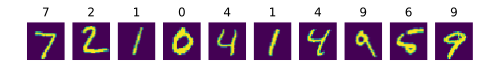

In [87]:
with tf.Session() as sess:
    #Initialize our variables
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        
        for i in range(batches): #(60000/100)
            offset = i*epoch
            #Get batches of images & labels - small portion
            x = x_train[offset: offset + batch_size]
            y = y_train[offset: offset + batch_size]
            #Run the optimizer
            sess.run(optimizer,feed_dict = {X:x,Y:y}) # we are passing one batch of x & y data to the placeholder
            #Compute the cost
            c = sess.run(cost,feed_dict = {X:x,Y:y})
        #Run if statement to see what the cost function is for each step of the training
        if not epoch %1:
            print(f'epoch = {epoch} cost = {c:.4f}')
    correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(Y,1)) # argmax gives the index of the large value
    #accuracy - take average value of all these values to see how many correct & wrong data we got
    accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32)) # case is same as astype in numpy
    acc = accuracy.eval({X:x_test,Y:y_test})
    print(acc)
    print(f'Accuracy: {acc * 100:.2f}%')
    
    #Do some simple predictions on single images to see what we get 
    fig,axes = plt.subplots(1,10,figsize=(8,4))
    for img,ax in zip(x_test[:10],axes):
        guess = np.argmax(sess.run(pred,feed_dict={X:[img]}))
        ax.set_title(guess)
        ax.imshow(img.reshape((28,28)))
        ax.axis('off')
    

When we initialize our weights and bias we use random numbers and normal distribution

W = tf.Variable(np.random.randn(784, 10).astype(np.float32))
B = tf.Variable(np.random.randn(10).astype(np.float32))

How we initialize these weights can have a huge impact of how things performs, we need to initialize 
these values into small values

0.1 times random values
W = tf.Variable(0.1 * np.random.randn(784, 10).astype(np.float32))
B = tf.Variable(0.1 * np.random.randn(10).astype(np.float32))

we should get a more accuracy value

##### Why it is better to initialize weights and biases to 0

Small weights give more accurate result because the X*W does comes out to be a small value which makes us operate in the flat region of the softmax curve. With higher weights you can see the softmax just blows up.

### Lets look at how the cost function works


$
C = \sum -Y\ln(pred)
$

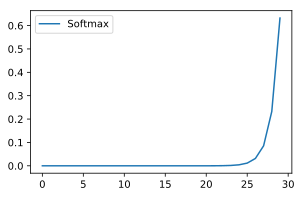

In [84]:

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

x = np.arange(30)
fig, ax = plt.subplots(1, figsize=(4.7, 3))
ax.plot(x, softmax(x), label='Softmax')
ax.legend()
plt.show()